In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
tf.test.is_built_with_cuda()

True

# Tratamento de Dados

## Dados cru

In [3]:
path = r'C:\Users\adria\1Python\Meu_novo_projeto\WIN_N_1K\WIN_N_1k.csv'
raw = pd.read_csv(path, index_col=0, parse_dates=True)

In [4]:
raw

,open,high,low,close,tick_volume,real_volume
time,,,,,,
2022-01-18 11:38:00,106635.0,106725.0,106610.0,106705.0,17263,64315
2022-01-18 11:39:00,106710.0,106825.0,106665.0,106785.0,25017,90996
2022-01-18 11:40:00,106780.0,106860.0,106675.0,106685.0,30803,110379
2022-01-18 11:41:00,106690.0,106910.0,106665.0,106885.0,30323,112419
2022-01-18 11:42:00,106880.0,106965.0,106800.0,106955.0,22614,80706
...,...,...,...,...,...,...
2022-10-13 16:55:00,114915.0,114920.0,114915.0,114915.0,38,275
2022-10-13 16:56:00,114920.0,114920.0,114915.0,114920.0,56,240
2022-10-13 16:57:00,114920.0,114920.0,114915.0,114920.0,42,200


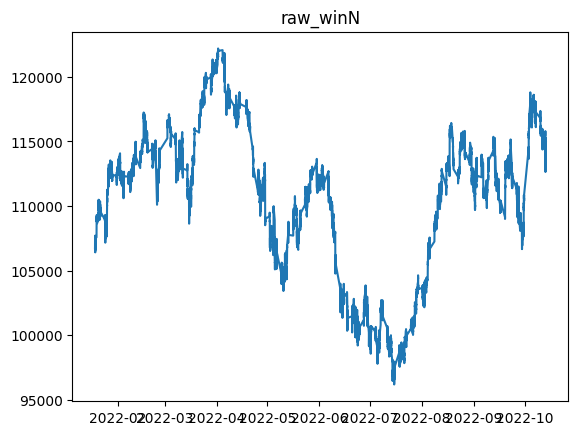

In [7]:
plt.plot(raw['close'])
#plt.plot(df['x'], df['y2'], label='y2')

# Adicione um título e legendas aos eixos
plt.title('raw_winN')
#plt.xlabel('Eixo x')
#plt.ylabel('Eixo y')
#plt.legend()

# Exiba o gráfico
plt.show()

## Extração e modelagem de dados

In [ ]:
# 1,2,4,8,16,32,64,128,256,512

In [8]:
df = pd.DataFrame()

In [10]:
# Seta os dados
df['high'] = raw['high']
df['low'] = raw['low']
df['close'] = raw['close']
df['open'] = raw['open']

In [12]:
# Dados fabricados
df['media_hl'] = (raw['high'] + raw['low']) / 2
df['media_oc'] = (raw['open'] + raw['close']) / 2

df['media_hl'] = (raw['high'] + raw['low']) / 2
df['media_oc'] = (raw['open'] + raw['close']) / 2

#Bolinger High
periodo = 12
desvios = 2

df["mm"] = raw["high"].rolling(periodo).mean()

df["desvio"] = raw["high"].rolling(periodo).std()
df["Banda_Sup"] = df["mm"] + (df["desvio"]*desvios)
df["Banda_Inf"] = df["mm"] - (df["desvio"]*desvios)

df = df.drop('desvio', axis=1)


In [13]:
df

,high,low,close,open,media_hl,media_oc,desvio,mm,Banda_Sup,Banda_Inf
time,,,,,,,,,,
2022-01-18 11:38:00,106725.0,106610.0,106705.0,106635.0,106667.5,106670.0,NaN,NaN,NaN,NaN
2022-01-18 11:39:00,106825.0,106665.0,106785.0,106710.0,106745.0,106747.5,NaN,NaN,NaN,NaN
2022-01-18 11:40:00,106860.0,106675.0,106685.0,106780.0,106767.5,106732.5,NaN,NaN,NaN,NaN
2022-01-18 11:41:00,106910.0,106665.0,106885.0,106690.0,106787.5,106787.5,NaN,NaN,NaN,NaN
2022-01-18 11:42:00,106965.0,106800.0,106955.0,106880.0,106882.5,106917.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-13 16:55:00,114920.0,114915.0,114915.0,114915.0,114917.5,114915.0,4.330127,114925.000000,114933.660254,114916.339746
2022-10-13 16:56:00,114920.0,114915.0,114920.0,114920.0,114917.5,114920.0,4.166667,114923.888889,114932.222222,114915.555556
2022-10-13 16:57:00,114920.0,114915.0,114920.0,114920.0,114917.5,114920.0,3.632416,114922.777778,114930.042609,114915.512946


In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop('time', axis=1)

In [ ]:
# Calcula os retornos dos recursos e da saída
retornos = df.pct_change().dropna()

In [ ]:
retornos = retornos.reset_index()

In [ ]:
retornos = retornos.drop('index', axis=1)

In [ ]:
# Calcula os valores iniciais dos retornos acumulados
ret_acum = (1 + retornos).cumprod()

In [ ]:
# Separa os dados em treino, validação e teste
tamanho_treino = int(len(retornos) * 0.7)
tamanho_valid = int(len(retornos) * 0.2)
tamanho_teste = len(retornos) - tamanho_treino - tamanho_valid

dados_treino = retornos[:tamanho_treino]
dados_valid = retornos[tamanho_treino:tamanho_treino+tamanho_valid]
dados_teste = retornos[-tamanho_teste:]

In [ ]:
# Define a janela de tempo para as sequências
janela_tempo = 5

In [ ]:
# Cria os geradores de sequências
gerador_treino = TimeseriesGenerator(dados_treino[['close', 'high', 'low']].values, 
                                     dados_treino[['close', 'high', 'low']].values, 
                                     length=janela_tempo, batch_size=512)

gerador_valid = TimeseriesGenerator(dados_valid[['close', 'high', 'low']].values, 
                                    dados_valid[['close', 'high', 'low']].values, 
                                    length=janela_tempo, batch_size=512)

gerador_teste = TimeseriesGenerator(dados_teste[['close', 'high', 'low']].values, 
                                    dados_teste[['close', 'high', 'low']].values, 
                                    length=janela_tempo, batch_size=512)

In [ ]:
# Cria o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(64, input_shape=(janela_tempo, 3), return_sequences=True))
#modelo.add(Dropout(0.2))
modelo.add(LSTM(32, return_sequences=True))
#modelo.add(Dropout(0.1))
modelo.add(LSTM(16, return_sequences=True))
modelo.add(LSTM(8))
modelo.add(Dense(1))

In [ ]:
# Compila o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanAbsolutePercentageError(), metrics='mse')

In [ ]:
# Define os callbacks
checkpoint = ModelCheckpoint("my_checkpoint.h5", save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=100)


In [ ]:
%%time
# Treina o modelo
modelo.fit(gerador_treino, epochs=500, validation_data=gerador_valid, callbacks=[checkpoint, early_stop])

In [ ]:
# Carrega o melhor modelo salvo
modelo.load_weights("my_checkpoint.h5")

In [ ]:
# Faz as previsões no conjunto de teste
previsao = modelo.predict(gerador_teste)

In [ ]:
len(previsao)

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2['close'] = dados_teste['close']

In [ ]:
df4 = pd.DataFrame()

In [ ]:
df4['close'] = dados_teste['close'].iloc[janela_tempo:]

In [ ]:
df4

In [ ]:
df4 = df4.reset_index()

In [ ]:
df4 = df4.drop('index', axis=1)

In [ ]:
df4['previsao'] = previsao

In [ ]:
df4

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(df4['close'][:20], label='close')
plt.plot(df4['previsao'][:20], label='previsao')
#plt.plot(retornos['low'][:20], label='previsao')
plt.show()

In [ ]:
plt.plot(df4['previsao'])

In [ ]:
plt.plot(df5['close'], df5[''], label='y1')
plt.plot(df['x'], df['y2'], label='y2')

# Adicione um título e legendas aos eixos
plt.title('Gráfico de exemplo')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

# Exiba o gráfico
plt.show()

In [ ]:
gerador_teste

In [ ]:
dados_teste.index

In [ ]:
# Obtém os retornos acumulados do conjunto de teste
saida = 2
ret_acum_teste = ret_acum[dados_teste.index][saida:]

In [ ]:
# Reverte o cálculo dos retornos para obter as previsões em termos de preços
preco_teste = np.zeros_like(previsao)
preco_teste[0] = ret_acum_teste[saida] * (1 + previsao[0])
for i in range(1, len(previsao)):
    preco_teste[i] = preco_teste[i-1] * (1 + previsao[i])

In [ ]:
# Reverte o cálculo dos retornos do conjunto de teste para obter os preços reais

preco_real_teste = dados_teste['close'][janela_tempo:]

In [ ]:
# Calcula as métricas de avaliação
mae = mean_absolute_error(preco_real_teste, preco_teste)
mse = mean_squared_error(preco_real_teste, preco_teste)
r2 = r2_score(preco_real_teste, preco_teste)

In [ ]:
# Imprime as métricas de avaliação
print('MAE:', mae)
print('MSE:', mse)
print('R2:', r2)